In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Chemins vers les dossiers contenant les images
varroas_folder = "base/varroas_crop_20/"
non_varroas_folder = "base/non_varroas_crop_20/"
#varroas_folder = "D:/base/varroas_crop_20/"
#non_varroas_folder = "D:/base/non_varroas_crop_20/"


# Récupération des chemins des images dans chaque dossier
varroas_images = [os.path.join(varroas_folder, image_file) for image_file in os.listdir(varroas_folder)]
non_varroas_images = [os.path.join(non_varroas_folder, image_file) for image_file in os.listdir(non_varroas_folder)]

# Labels correspondants pour chaque classe
varroas_labels = [0] * len(varroas_images)  # Classe 0 pour les varroas
non_varroas_labels = [1] * len(non_varroas_images)  # Classe 1 pour les non-varroas

# Concaténation des données et des labels
images = varroas_images + non_varroas_images
labels = varroas_labels + non_varroas_labels

# Convertir les images en tableaux et les redimensionner si nécessaire
resized_images = []
for image_path in images:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (11, 11))  # dimensions souhaitées
    resized_images.append(resized_image)

# Convertir la liste en tableau numpy
X = np.array(resized_images)
y = np.array(labels)
print(y)
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[0 0 0 ... 1 1 1]


In [5]:
# Check if classes are balanced
import numpy as np

# Assuming y_train and y_test are NumPy arrays
train_class_counts = np.unique(y_train, return_counts=True)[1]
test_class_counts = np.unique(y_test, return_counts=True)[1]

# Check if classes are balanced in the training set
is_train_balanced = np.min(train_class_counts) / np.max(train_class_counts) >= 0.9

# Check if classes are balanced in the testing set
is_test_balanced = np.min(test_class_counts) / np.max(test_class_counts) >= 0.9

# Print the result
print("Training set balanced:", is_train_balanced)
print("Testing set balanced:", is_test_balanced)

Training set balanced: True
Testing set balanced: True


In [6]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

EPOCH = [1, 50]
BATCH_SIZE = [10, 1000]

hyperMatrix = dict(epochs=EPOCH, batch_size=BATCH_SIZE)

def buildModel(epochs=1, batch_size=10, optimizer="adam"):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), input_shape=(11, 11, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=buildModel, verbose=1)

grid = GridSearchCV(estimator=model, param_grid=hyperMatrix)

# On lance l'entrainement
history = grid.fit(X_train, y_train)


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 1465, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 735, in fit
    self._fit(
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 887, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 817, in _initialize
    self.target_encoder_ = self.target_encoder.fit(y)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\utils\transformers.py", line 188, in fit
    self._final_encoder = encoders[target_type].fit(y)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 859, in fit_transform
    return self.fit(X, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdesp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TargetReshaper.transform() takes 1 positional argument but 2 were given


In [ ]:
print(history.best_params_)
print(history.best_score_ )

In [7]:
#Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3) ,input_shape = (11,11,3),activation = 'relu'),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_acc = []
train_mean_acc = []
train_std_acc = []

test_acc = []
test_mean_acc = []
test_std_acc = []

for rep in range(5):
    model.fit(X_train, y_train, epochs=20, batch_size=50,verbose=False)
    results = model.evaluate(X_train, y_train)
    print(f"Metrics on training set for run {rep+1}: loss={results[0]}, accuracy={results[1]}" )
    train_acc.append(results[1])
    train_mean_acc.append(np.mean(train_acc))
    train_std_acc.append(np.std(train_acc))

    results_test = model.evaluate(X_test, y_test)
    print(f"Metrics on test set for run {rep+1}: loss={results_test[0]}, accuracy={results_test[1]}" )
    test_acc.append(results[1])
    test_mean_acc.append(np.mean(test_acc))
    test_std_acc.append(np.std(test_acc))


print('train mean accuracy = ', np.mean(train_acc))
print('train std accuracy  = ', np.std(train_acc))
print('test mean accuracy = ', np.mean(test_acc))
print('test std accuracy  = ', np.std(test_acc))

305/305 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9981
Metrics on training set for run 1: loss=0.004731152206659317, accuracy=0.998053252696991
131/131 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9962
Metrics on test set for run 1: loss=0.016901405528187752, accuracy=0.9961758852005005
305/305 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9997
Metrics on training set for run 2: loss=0.0010108614806085825, accuracy=0.9996926188468933
131/131 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9978
Metrics on test set for run 2: loss=0.011222507804632187, accuracy=0.9978489279747009
305/305 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9946
Metrics on training set for run 3: loss=0.014990595169365406, accuracy=0.9945696592330933
131/131 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9926
Metrics on test set for 

In [16]:
from keras.utils.vis_utils import plot_model

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

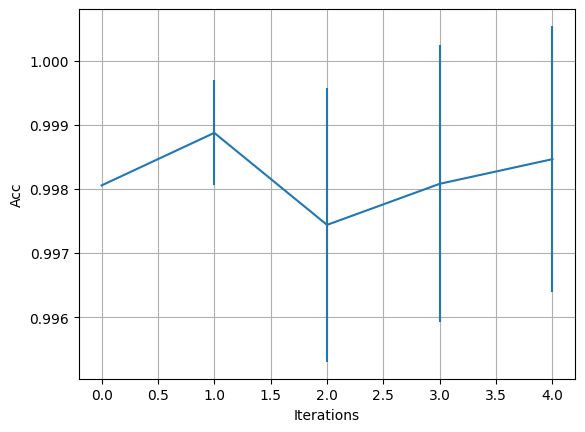

In [8]:
fig, ax = plt.subplots()
ax.errorbar(range(5), train_mean_acc, train_std_acc)
plt.xlabel('Iterations')
plt.ylabel('Acc')
plt.grid()
plt.show()

## Metrics

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained the Sequential model and have X_train, y_train

# Predict labels for training data
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred >= 0.5).astype(int)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_cm = confusion_matrix(y_train, y_train_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)
print("Training Confusion Matrix:")
print(train_cm)

305/305 [==============================] - 0s 1ms/step
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-Score: 1.0
Training Confusion Matrix:
[[4836    0]
 [   0 4924]]


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained the Sequential model and have X_test, y_test

# Predict labels for test data
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred >= 0.5).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1-Score:", test_f1)
print("Testing Confusion Matrix:")
print(test_cm)

131/131 [==============================] - 0s 1ms/step
Testing Accuracy: 0.9983269598470363
Testing Precision: 0.9983270905878505
Testing Recall: 0.9983269598470363
Testing F1-Score: 0.9983269681652501
Testing Confusion Matrix:
[[2132    4]
 [   3 2045]]


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

131/131 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9976
Test accuracy: 0.9976099133491516


131/131 [==============================] - 0s 2ms/step


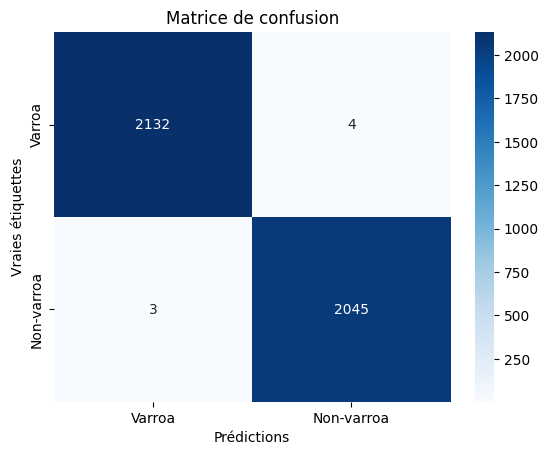

In [11]:
# Supposez que vous avez entraîné votre modèle et obtenu les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

# Créer la matrice de confusion
confusion_matrix = confusion_matrix(y_test, y_pred_binary)

# Définir les étiquettes de classe
class_labels = ['Varroa', 'Non-varroa']  # Remplacez les noms des classes par les vôtres

# Créer une heatmap de la matrice de confusion
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')

# Afficher la figure
plt.show()




In [12]:
model.save("counter_varroas_model.h5")